# Load, prepare and inspect data

In [1]:
import numpy as np
import pandas as pd 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings('ignore')

stress_level_df = pd.read_csv('/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv')
stress_df = pd.read_csv('/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv')

In [2]:
stress_level_df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [3]:
stress_df.columns

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

In [4]:
stress_level_df.shape

(1100, 21)

In [5]:
stress_df.shape

(843, 26)

In [6]:
stress_level_df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [7]:
stress_df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [8]:
stress_df['Which type of stress do you primarily experience?'] = stress_df['Which type of stress do you primarily experience?'].replace({
    'Eustress (Positive Stress) - Stress that motivates and enhances performance.': 'Eustress',
    'No Stress - Currently experiencing minimal to no stress.': 'No stress',
    'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.': 'Stress'
})
stress_df['Which type of stress do you primarily experience?'].unique()

array(['Eustress', 'No stress', 'Stress'], dtype=object)

In [9]:
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

# Stress level data analysis

## Feature Correlation

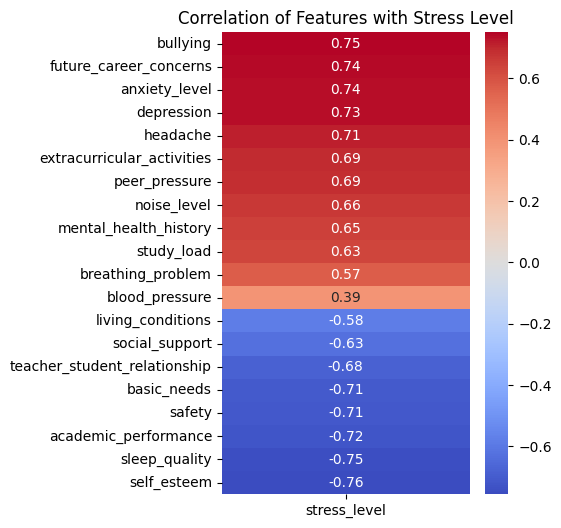

In [10]:
correlation_matrix = stress_level_df.corr()[['stress_level']]
correlation_matrix.drop('stress_level', inplace=True)

correlation_matrix = correlation_matrix.sort_values(by='stress_level', ascending=False)

plt.figure(figsize=(4,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features with Stress Level")
plt.show()

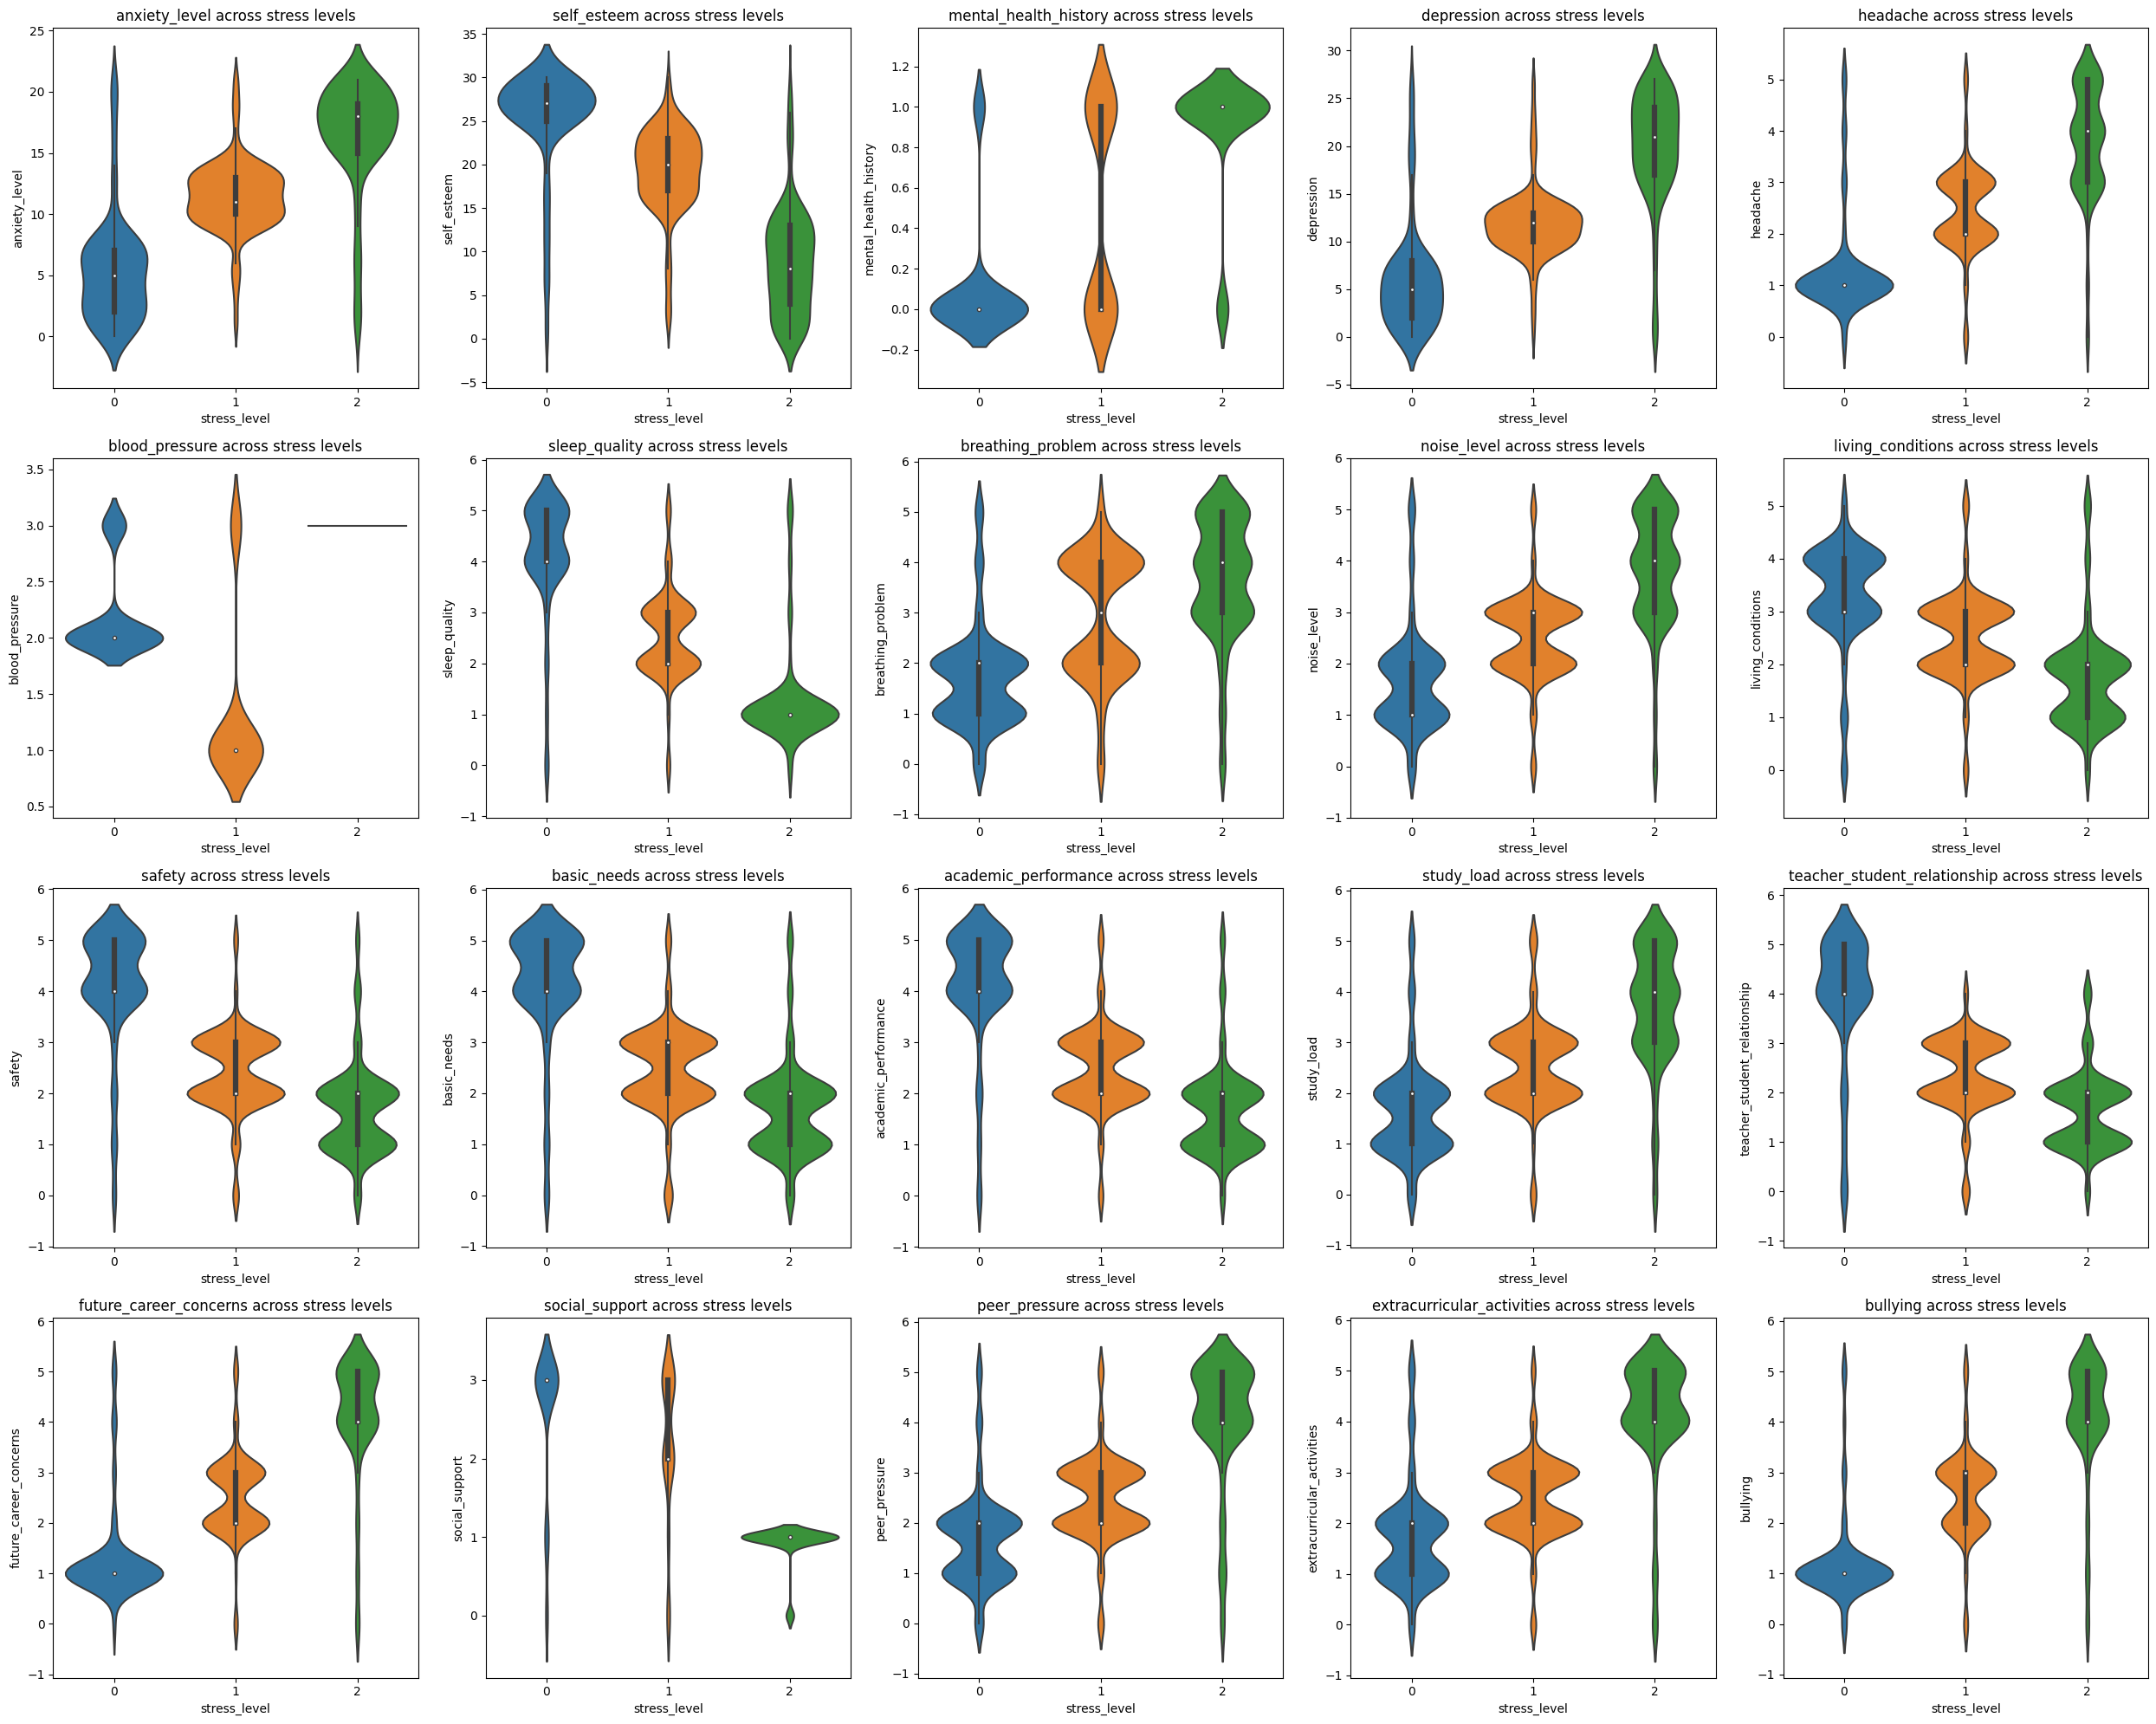

In [11]:
figure, axes = plt.subplots(4, 5, figsize=(25, 20))
axes = axes.flatten()
target_features = stress_level_df.columns
target_features = target_features.drop('stress_level')
for i, feature in enumerate(target_features):
    sns.violinplot(x='stress_level', y=feature, data=stress_level_df, inner="box", ax=axes[i])
    axes[i].set_title(f"{feature} across stress levels")

plt.tight_layout()
plt.show()

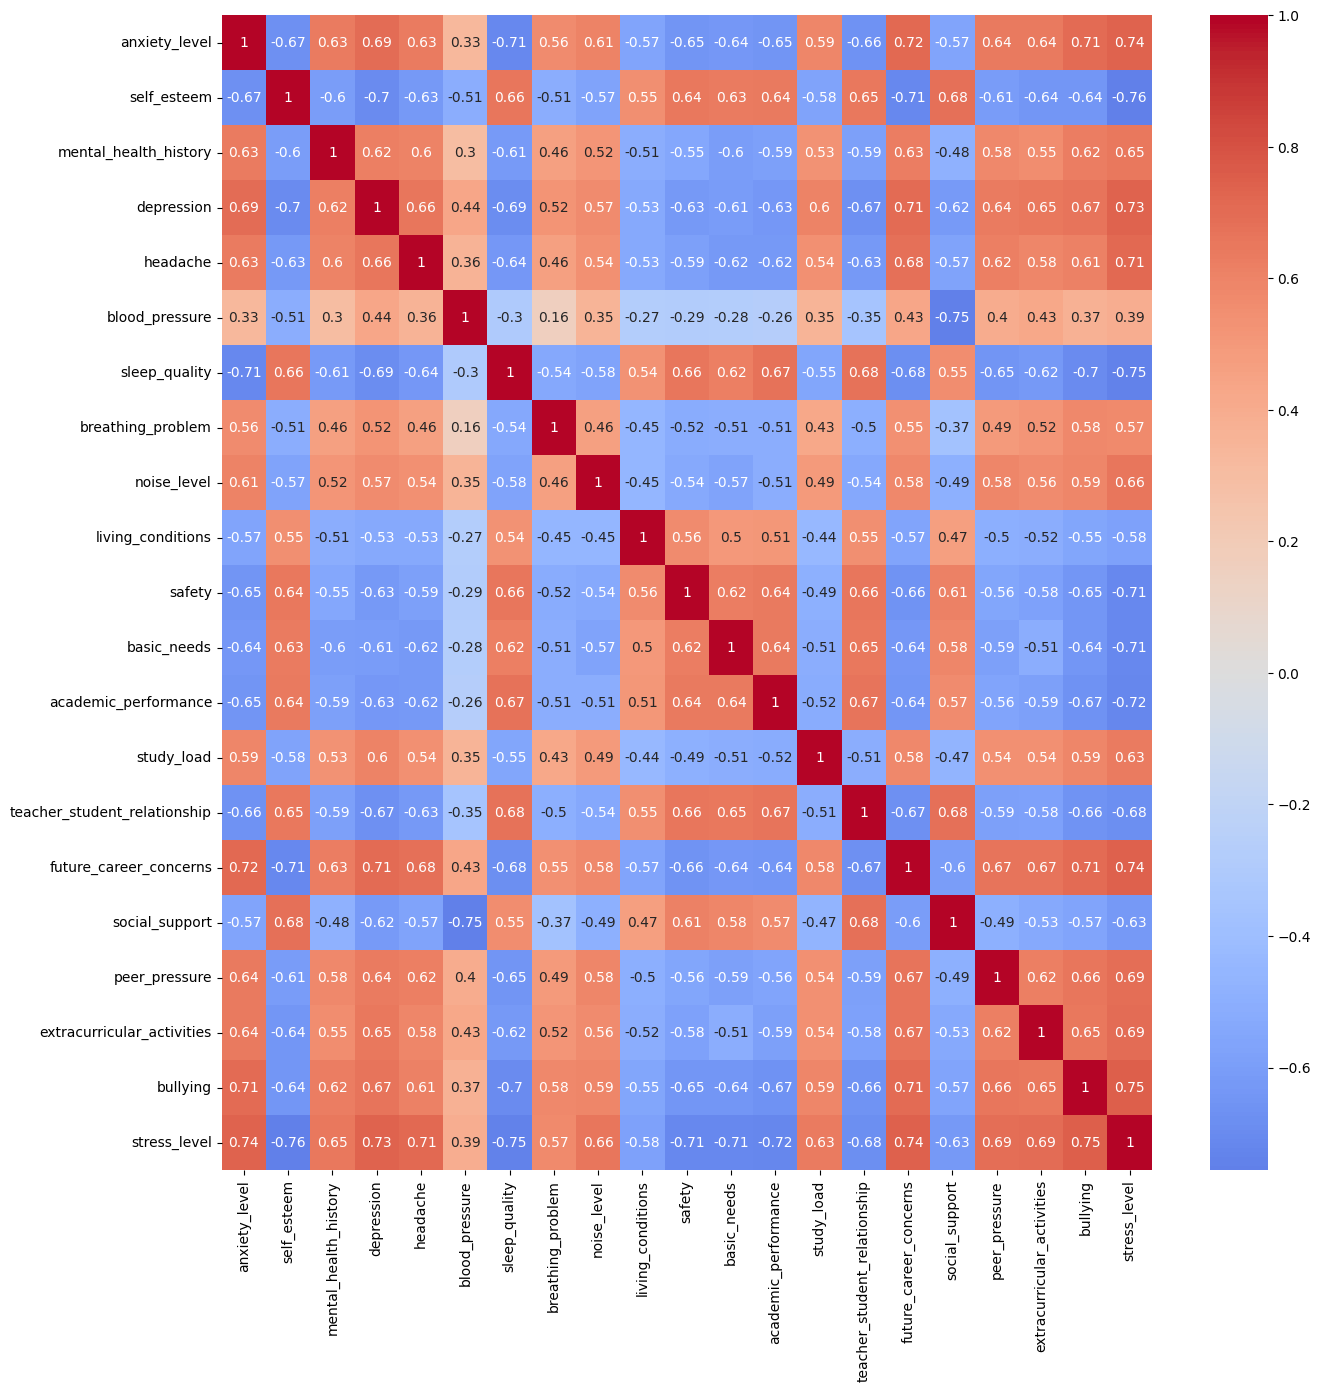

In [12]:
correlation_matrix = stress_level_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

## Stress level distribution

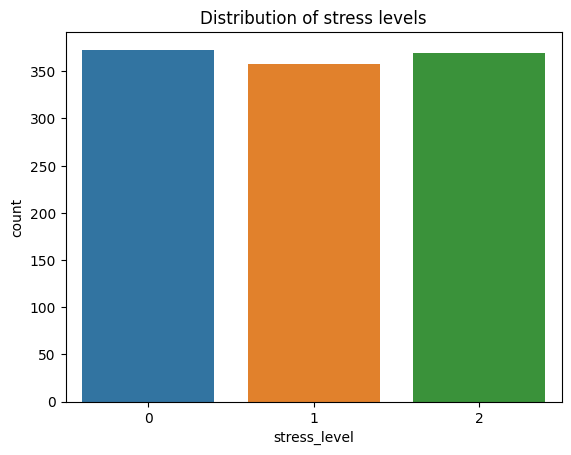

In [13]:
sns.countplot(x='stress_level', data=stress_level_df)
plt.title("Distribution of stress levels")
plt.show()

# Stress questionaire data analysis

## Feature correlation

## Distribution

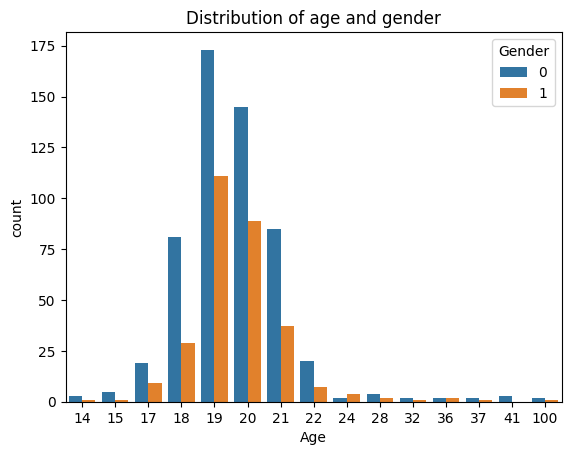

In [14]:
sns.countplot(x='Age', hue='Gender', data=stress_df)
plt.title("Distribution of age and gender")
plt.show()

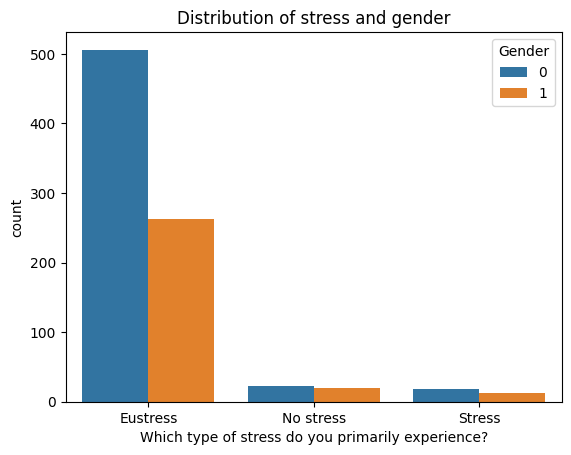

In [15]:
sns.countplot(x='Which type of stress do you primarily experience?', hue='Gender', data=stress_df)
plt.title("Distribution of stress and gender")
plt.show()

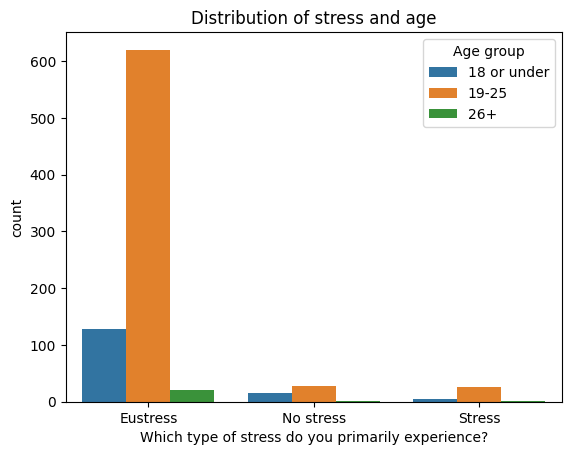

In [16]:
stress_age_cat = stress_df

bins = [0, 18, 25, 100]
labels = ['18 or under', '19-25', '26+']
stress_age_cat['Age group'] = pd.cut(stress_age_cat['Age'], 
                                     bins=bins, 
                                     labels=labels)

sns.countplot(x='Which type of stress do you primarily experience?', hue='Age group', data=stress_age_cat)
plt.title("Distribution of stress and age")
plt.show()

# Models to predict stress levels

In [17]:
X = stress_level_df.drop('stress_level', axis=1)
y = stress_level_df['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

def trainModelDisplayResults(model):
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    if isinstance(model, XGBClassifier):
        plt.figure(figsize=(10,6))
        plot_importance(model)
    else:
        plt.title("Feature importance")
        importance = model.coef_[0] if isinstance(model, LogisticRegression) else model.feature_importances_
        plt.bar([x for x in range(len(importance))], importance)
        plt.xticks(range(len(importance)), X, rotation=90)
        plt.show()

## Logistic regression

Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       112
           1       0.93      0.91      0.92       107
           2       0.92      0.88      0.90       111

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



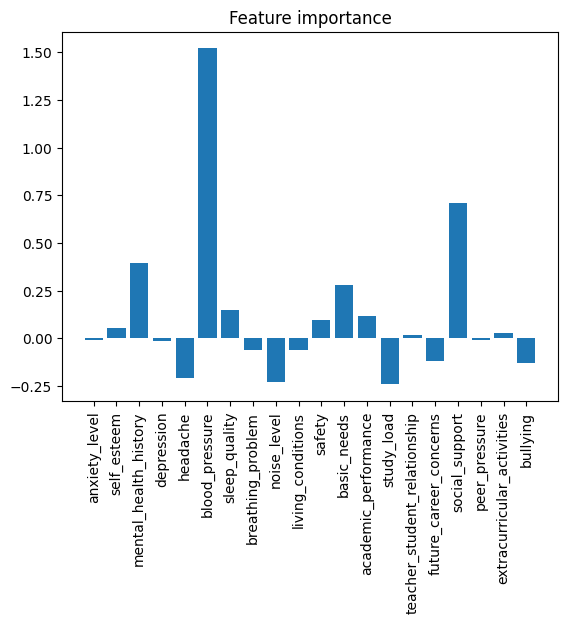

In [18]:
lr_model =  LogisticRegression(random_state=23, multi_class='multinomial', solver='lbfgs', max_iter=1000)
trainModelDisplayResults(lr_model)

## XGBoost

Accuracy: 0.9030303030303031
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       112
           1       0.91      0.93      0.92       107
           2       0.90      0.90      0.90       111

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



<Figure size 1000x600 with 0 Axes>

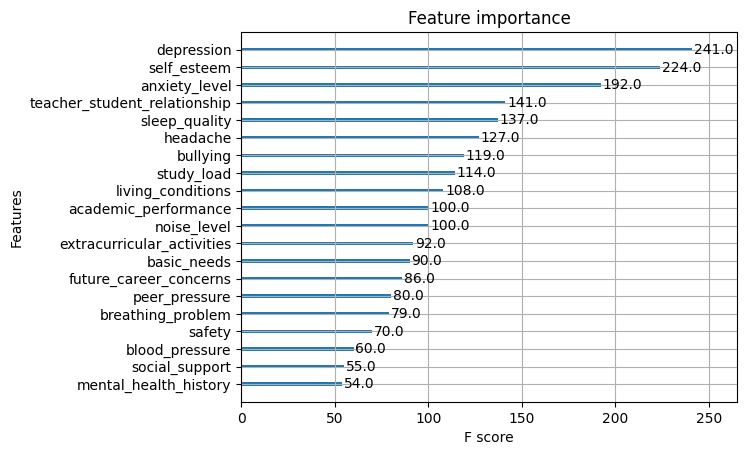

In [19]:
xgb_model = XGBClassifier(random_state=23, use_label_encoder=False, eval_metric='mlogloss')
trainModelDisplayResults(xgb_model)

## Random Forest

Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       112
           1       0.93      0.90      0.91       107
           2       0.92      0.90      0.91       111

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



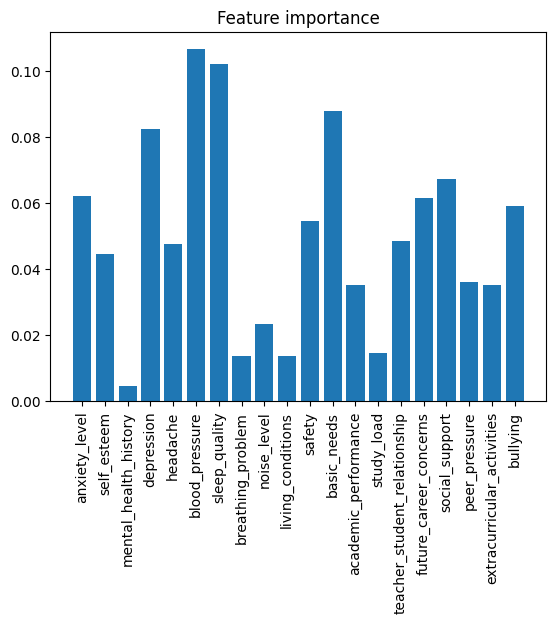

In [20]:
forest_model = RandomForestClassifier(random_state=23)
trainModelDisplayResults(forest_model)